## Treinar um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas.

In [2]:
# TensorFlow e tf.keras

import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

In [4]:
# Bibliotecas Auxiliares

import numpy as np
import matplotlib.pyplot as plt

Base de dados Fashion MNIST que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploração dos dados

Vamos explorar o formato da base de dados.

In [8]:
train_images.shape # 60K imagens no conjunto de treinamento

(60000, 28, 28)

In [9]:
len(train_labels) # 60K de labels no conjunto de treinamento

60000

In [10]:
train_labels # cada label é um inteiro entre 0 e 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape # existem 10K imagens no conjunto de teste

(10000, 28, 28)

In [14]:
len(test_labels) # do mesmo modo, 10K labes no conjunto de teste

10000

## Pré-processamento

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

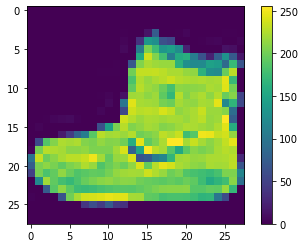

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
# plt.grid(False)

plt.show()

In [ ]:
# Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, 
# dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste 
# podem ser pré-processados do mesmo modo:

train_images = train_images / 255.0

test_images = test_images / 255.0

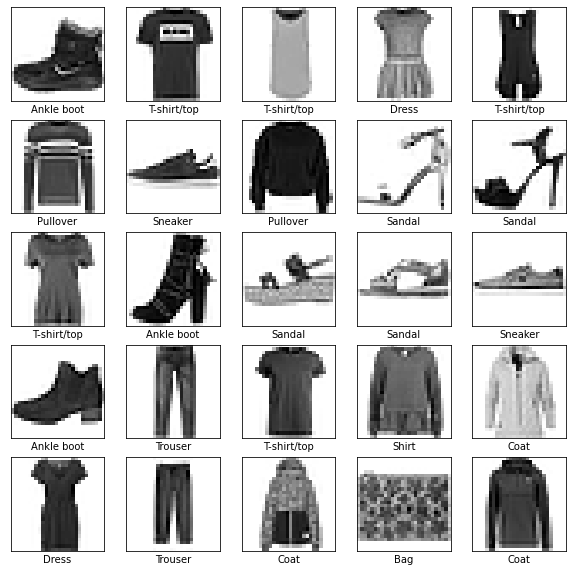

In [19]:
# Verificando se os dados estão no formato correto e que estamos prontos para construir e treinar a rede, 
# vamos observar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada uma.

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

## Montar as camadas
O principal bloco de construção da rede neural é a camada (layer). As camadas extraem representações dos dados inseridos na rede.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# a primeira camada da rede transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) 
# para um array de uma dimensão (de 28 * 28 = 784 pixels).

# a segunda camada tem 128 nós (neurônios). A terceira camamada é uma softmaxde 10 nós que retorna um array de 10 probabilidades,
# cuja soma resulta em 1.

## Compilação do modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

- Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.

- Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.

- Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.


In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Treinamento do modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays train_images e train_labels.
<br></br>
2. O modelo aprende como associar as imagens as labels.
<br></br>
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array test_images. Verificamos se as previsões combinaram com as labels do array test_labels.

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 3.1613 - accuracy: 0.6779
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6991 - accuracy: 0.7344
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5753 - accuracy: 0.7961
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5282 - accuracy: 0.8168
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5083 - accuracy: 0.8239
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4961 - accuracy: 0.8298
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4832 - accuracy: 0.8349
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4752 - accuracy: 0.8382
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4666 - accuracy: 0.8425
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.458

In [23]:
# À medida que o modelo treina, as métricas loss e acurácia são mostradas. 
# O modelo atinge uma acurácia de 0.84 (ou 84%) com o conjunto de treinamento.

## Avaliação da acurácia

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5167 - accuracy: 0.8337 - 886ms/epoch - 3ms/step

Test accuracy: 0.8337000012397766


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um overfitting. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([3.5936262e-15, 6.1107272e-11, 0.0000000e+00, 9.2788204e-14,
       0.0000000e+00, 3.0799858e-02, 1.7913380e-18, 1.9040945e-01,
       1.2187916e-10, 7.7879065e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
class_names[9]

'Ankle boot'

In [30]:
test_labels[0]

9

In [31]:
# Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

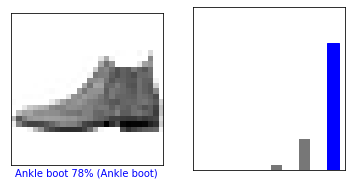

In [32]:
# previsão da imagem na posição 0, do array de predição

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

plt.show()

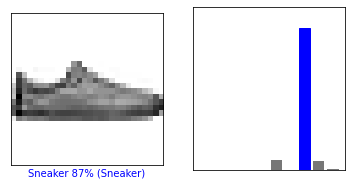

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

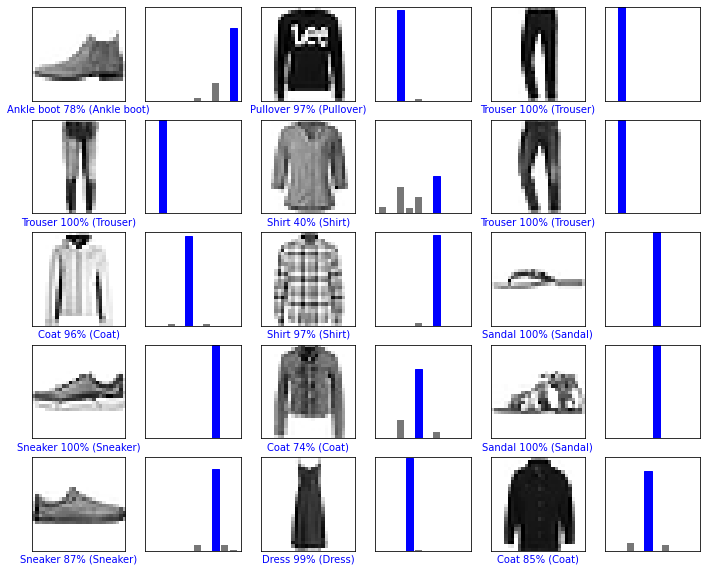

In [34]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

Finamente, usamos o modelo treinado para fazer a predição de uma única imagem.

In [35]:
# pegamos uma imagem do conjunto de testes
img = test_images[0]

print(img.shape)

(28, 28)


Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista.

In [36]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.5936537e-15 6.1107619e-11 0.0000000e+00 9.2788915e-14 0.0000000e+00
  3.0799858e-02 1.7913585e-18 1.9040945e-01 1.2188009e-10 7.7879065e-01]]


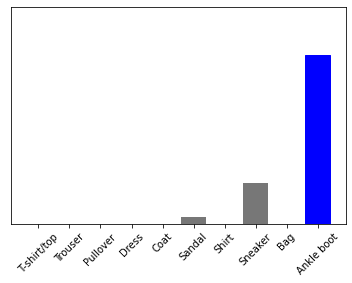

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

9

In [40]:
# E, como antes, o modelo previu a label como 9.